In [10]:
import vnpy_crypto
vnpy_crypto.init()
from vnpy_ctastrategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy_ctastrategy.strategies.atr_rsi_strategy import AtrRsiStrategy
from vnpy_ctastrategy.strategies.boll_channel_strategy import BollChannelStrategy
from vnpy_ctastrategy.strategies.dual_thrust_strategy import DualThrustStrategy
from vnpy_ctastrategy.strategies.high_frequency_strategy import HighFrequencyStrategy
from datetime import datetime
from vnpy.trader.constant import Exchange, Interval
import quantstats as qs
import pandas as pd
from importlib import reload
import vnpy_portfoliostrategy
# from examples.custom strategies.high_frequency_strategy import HighFrequencyStrategy
reload(vnpy_portfoliostrategy)

<module 'vnpy_portfoliostrategy' from '/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/vnpy_portfoliostrategy/__init__.py'>

In [11]:
def run_backtesting(strategy_class, setting, vt_symbol, interval, start, end, rate, slippage, size, pricetick, capital):
    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=vt_symbol,
        interval=interval,
        start=start,
        end=end,
        rate=rate,
        slippage=slippage,
        size=size,
        pricetick=pricetick,
        capital=capital    
    )
    engine.add_strategy(strategy_class, setting)
    engine.load_data()
    engine.run_backtesting()
    df = engine.calculate_result()
    return df

def show_portafolio(df):
    engine = BacktestingEngine()
    engine.calculate_statistics(df)
    engine.show_chart(df)

In [13]:
results = run_backtesting(
    strategy_class=DualThrustStrategy, 
    setting={}, 
    vt_symbol="BTCUSD.BINANCE",
    interval=Interval.MINUTE,
    start= datetime(2022, 5, 3), 
    end= datetime(2023, 5, 3),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.1,
    capital=1_000_000,
    )

2023-06-07 16:13:19.559200	开始加载历史数据
2023-06-07 16:13:19.559288	加载进度：# [0%]
2023-06-07 16:13:19.560450	加载进度：# [10%]
2023-06-07 16:13:19.561912	加载进度：## [20%]
2023-06-07 16:13:19.563551	加载进度：### [30%]
2023-06-07 16:13:19.565595	加载进度：#### [39%]
2023-06-07 16:13:19.567256	加载进度：##### [49%]
2023-06-07 16:13:19.568961	加载进度：###### [59%]
2023-06-07 16:13:19.570280	加载进度：####### [69%]
2023-06-07 16:13:19.571406	加载进度：######## [79%]
2023-06-07 16:13:19.572770	加载进度：######### [89%]
2023-06-07 16:13:19.574759	加载进度：########## [99%]
2023-06-07 16:13:19.575139	历史数据加载完成，数据量：525152
2023-06-07 16:13:19.575186	策略初始化完成
2023-06-07 16:13:19.575197	开始回放历史数据
2023-06-07 16:13:20.178282	回放进度：= [0%]
2023-06-07 16:13:20.772724	回放进度：== [10%]
2023-06-07 16:13:22.804065	回放进度：=== [20%]
2023-06-07 16:13:23.367764	回放进度：==== [30%]
2023-06-07 16:13:23.946040	回放进度：===== [40%]
2023-06-07 16:13:24.561526	回放进度：====== [50%]
2023-06-07 16:13:25.993543	回放进度：======= [60%]
2023-06-07 16:13:26.587205	回放进度：======== [70%]
2023-06-07 16:1

In [14]:
results.index = pd.to_datetime(results.index)

In [15]:
show_portafolio(results)

2023-06-07 16:13:37.954400	开始计算策略统计指标
2023-06-07 16:13:37.964253	------------------------------
2023-06-07 16:13:37.964305	首个交易日：	2022-05-04 00:00:00
2023-06-07 16:13:37.964317	最后交易日：	2023-05-03 00:00:00
2023-06-07 16:13:37.964324	总交易日：	365
2023-06-07 16:13:37.964331	盈利交易日：	83
2023-06-07 16:13:37.964337	亏损交易日：	117
2023-06-07 16:13:37.964349	起始资金：	1,000,000.00
2023-06-07 16:13:37.964358	结束资金：	1,497,145.64
2023-06-07 16:13:37.964365	总收益率：	49.71%
2023-06-07 16:13:37.964372	年化收益：	32.69%
2023-06-07 16:13:37.964378	最大回撤: 	-1,293,924.59
2023-06-07 16:13:37.964385	百分比最大回撤: -75.07%
2023-06-07 16:13:37.964391	最长回撤天数: 	261
2023-06-07 16:13:37.964398	总盈亏：	497,145.64
2023-06-07 16:13:37.964404	总手续费：	85,580.36
2023-06-07 16:13:37.964410	总滑点：	25,560.00
2023-06-07 16:13:37.964417	总成交金额：	2,852,678,700.00
2023-06-07 16:13:37.964424	总成交笔数：	426
2023-06-07 16:13:37.964431	日均盈亏：	1,362.04
2023-06-07 16:13:37.964437	日均手续费：	234.47
2023-06-07 16:13:37.964444	日均滑点：	70.03
2023-06-07 16:13:37.964450	日均成交金额：	7,815,

In [16]:
results

,close_price,pre_close,trades,trade_count,start_pos,end_pos,turnover,commission,slippage,trading_pnl,holding_pnl,total_pnl,net_pnl,balance,return,highlevel,drawdown,ddpercent
date,,,,,,,,,,,,,,,,,,
2022-05-04,39690.00,1.00,[],0,0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2022-05-05,36552.97,39690.00,[],0,0,0,0.0,0.00000,0.0,0.0,-0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2022-05-06,36013.77,36552.97,[],0,0,0,0.0,0.00000,0.0,0.0,-0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2022-05-07,35472.39,36013.77,[],0,0,0,0.0,0.00000,0.0,0.0,-0.0,0.0,0.00000,1.000000e+06,0.000000,1.000000e+06,0.00000,0.000000
2022-05-08,34038.40,35472.39,"[TradeData(gateway_name='BACKTESTING', extra=N...",2,0,0,20722212.0,621.66636,120.0,71148.0,-0.0,71148.0,70406.33364,1.070406e+06,0.068038,1.070406e+06,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-29,29230.45,29311.70,[],0,0,0,0.0,0.00000,0.0,0.0,-0.0,0.0,0.00000,1.436230e+06,0.000000,2.045664e+06,-609433.82037,-29.791491
2023-04-30,29233.21,29230.45,"[TradeData(gateway_name='BACKTESTING', extra=N...",2,0,0,17633721.0,529.01163,120.0,-4839.0,0.0,-4839.0,-5488.01163,1.430742e+06,-0.003828,2.045664e+06,-614921.83200,-30.059766
2023-05-01,28068.26,29233.21,"[TradeData(gateway_name='BACKTESTING', extra=N...",2,0,0,17152542.0,514.57626,120.0,67038.0,-0.0,67038.0,66403.42374,1.497146e+06,0.045367,2.045664e+06,-548518.40826,-26.813709


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2022-05-04  2022-05-04
End Period                 2023-05-03  2023-05-03
Risk-Free Rate             0.0%        0.0%
Time in Market             55.0%       100.0%

Cumulative Return          49.71%      -26.87%
CAGR﹪                     49.88%      -26.93%

Sharpe                     1.03        -0.17
Prob. Sharpe Ratio         90.19%      41.79%
Smart Sharpe               1.0         -0.17
Sortino                    1.83        -0.24
Smart Sortino              1.77        -0.23
Sortino/√2                 1.29        -0.17
Smart Sortino/√2           1.25        -0.16
Omega                      1.36        1.36

Max Drawdown               -75.07%     -60.24%
Longest DD Days            312         363
Volatility (ann.)          172.91%     50.53%
R^2                        0.01        0.01
Information Ratio          0.07        0.07
Calmar                     0.6

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-05-10,2022-05-11,2022-06-13,34,-75.065693,-67.877484
2,2022-06-25,2023-03-11,2023-05-03,312,-63.252057,-59.756413
3,2022-06-15,2022-06-16,2022-06-18,3,-9.029064,-8.554196


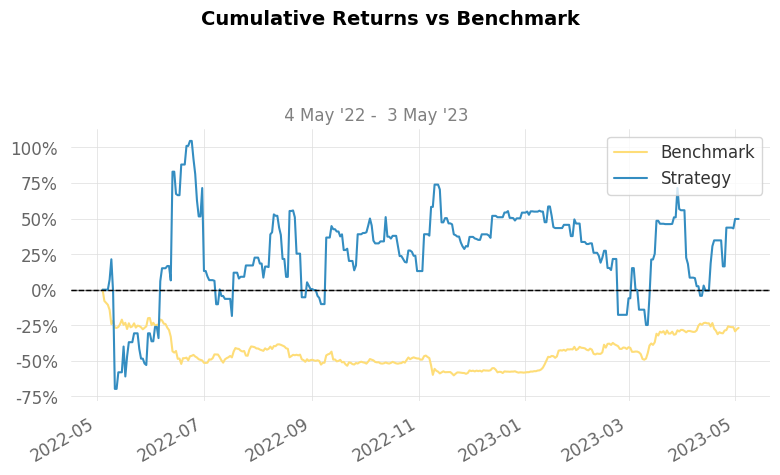

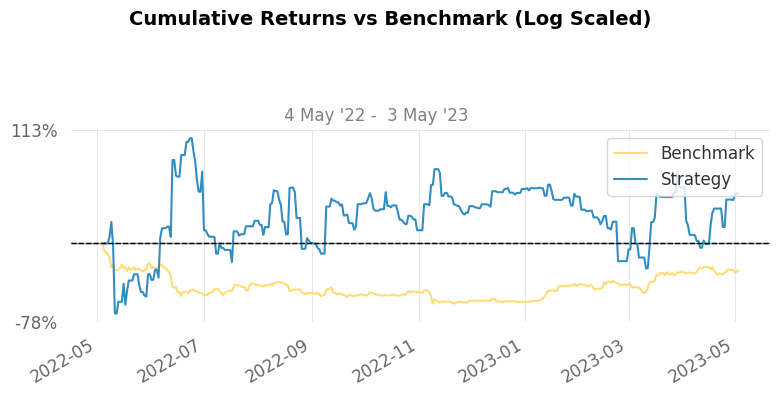

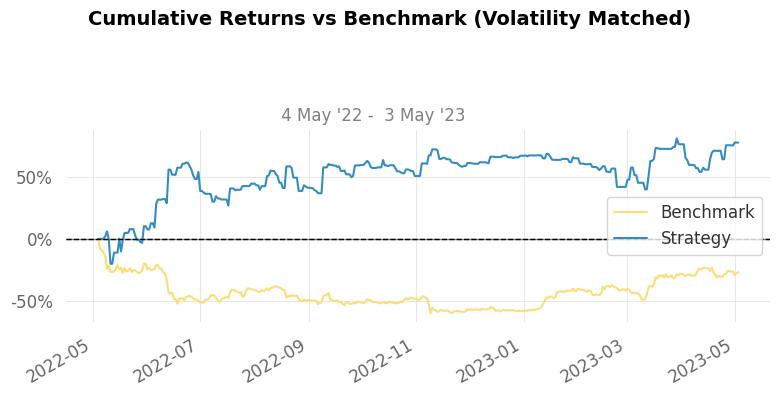

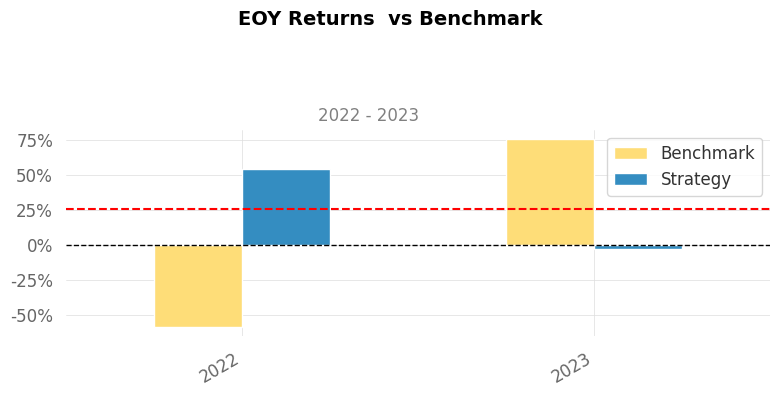

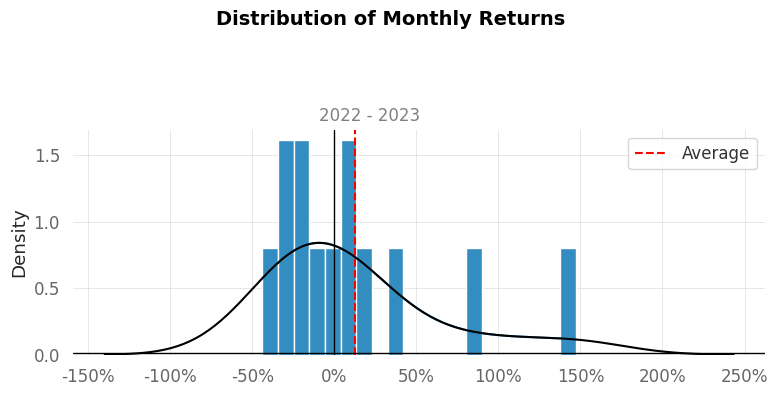

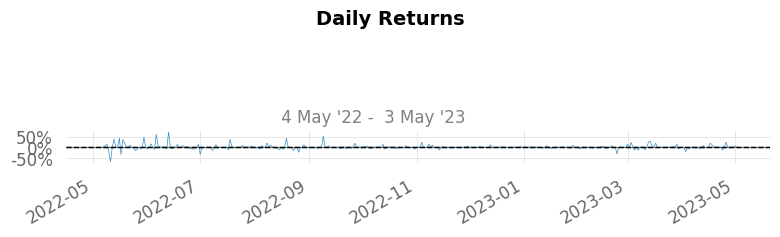

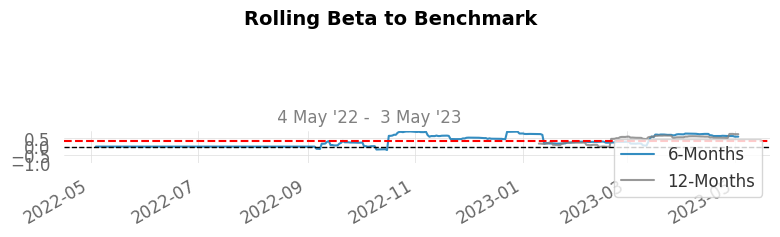

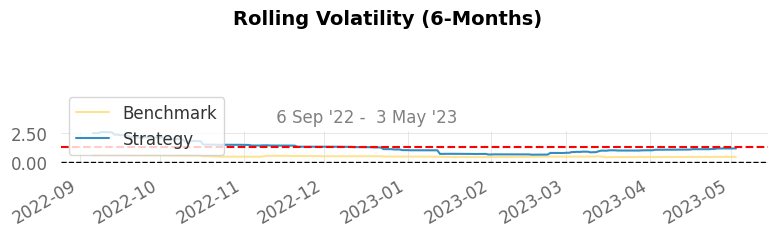

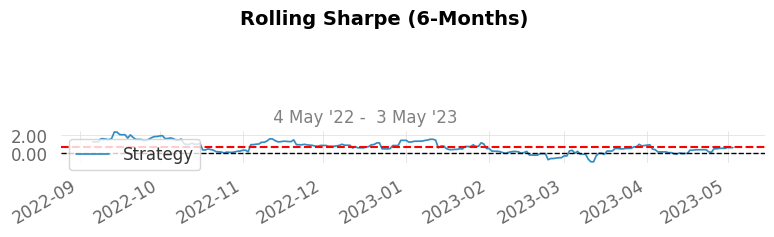

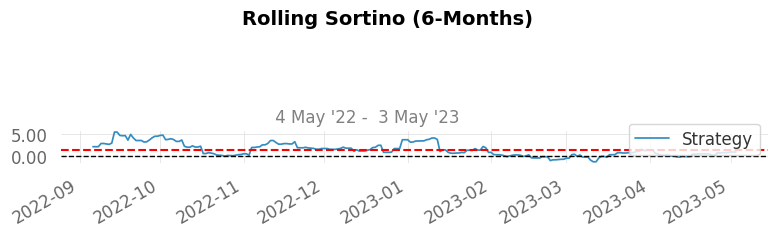

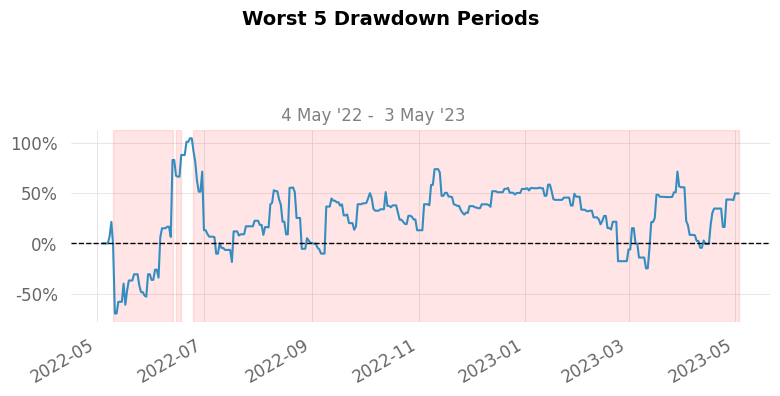

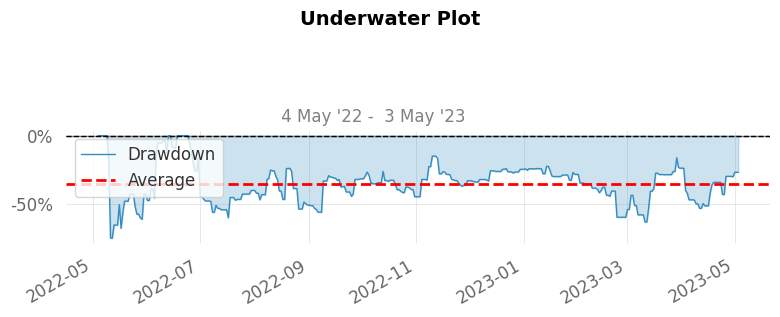

/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



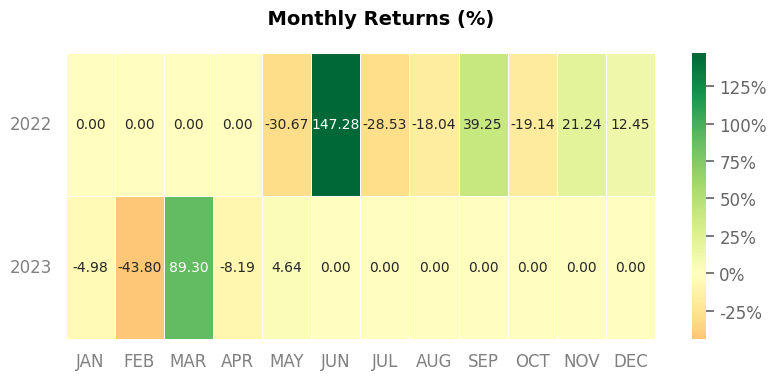

/home/shell007/anaconda3/envs/vnpy/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



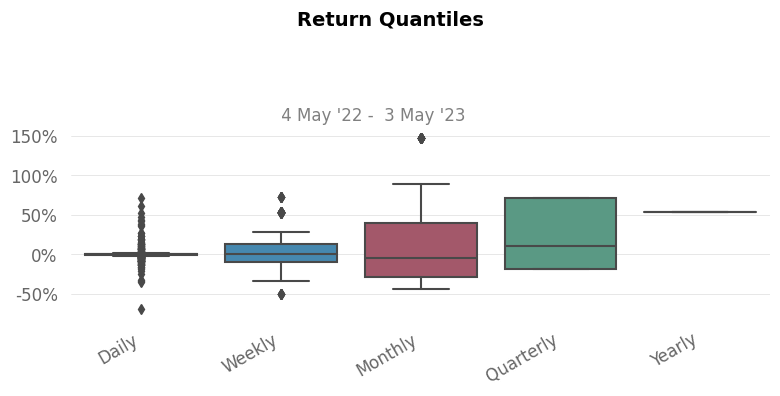

In [17]:
qs.reports.full(results['balance'], benchmark = results['close_price'])